## &#x1F310; &nbsp; Code Library, Style, and Links


Useful `LINKS`:

&#x1F4E1; &nbsp; [School Quality Reports. Educator Guide](http://schools.nyc.gov/NR/rdonlyres/967E0EE1-7E5D-4E47-BC21-573FEEE23AE2/0/201516EducatorGuideHS9252017.pdf)

&#x1F4E1; &nbsp; [New York City Department of Education](https://www.schools.nyc.gov)

&#x1F4E1; &nbsp; [NYC OpenData](https://opendata.cityofnewyork.us/)

&#x1F4E1; &nbsp; [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

&#x1F4E1; &nbsp; [Pandas Styling](https://pandas.pydata.org/pandas-docs/stable/style.html)

In [3]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto');
body {background-color: gainsboro;} 
a {color: #37c9e1; font-family: 'Roboto';} 
h1 {color: #37c9e1; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: slategray; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: #818286; font-family: 'Roboto';}
span {text-shadow: 4px 4px 4px #aaa;}
div.output_prompt, div.output_area pre {color: slategray;}
div.input_prompt, div.output_subarea {color: #37c9e1;}      
div.output_stderr pre {background-color: gainsboro;}  
div.output_stderr {background-color: slategrey;}       
</style>

In [4]:
import numpy as np 
import pandas as pd

import matplotlib.pylab as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [6]:
style_dict = {'background-color':'slategray',
              'color':'#37c9e1',
              'border-color': 'white',
              'font-family':'Roboto'}

## &#x1F310; &nbsp; Load and Preprocess the Data

In [5]:
school_explorer = pd.read_csv('2016 School Explorer.csv')
d5_shsat = pd.read_csv('D5 SHSAT Registrations and Testers.csv')
school_explorer.shape, d5_shsat.shape

((1272, 161), (140, 7))

In [7]:
drop_list = ['Adjusted Grade','New?','Other Location Code in LCGMS']
school_explorer = school_explorer.drop(drop_list, axis=1)

school_explorer.loc[[427,1023,712,908],'School Name'] = \
['P.S. 212 D12','P.S. 212 D30','P.S. 253 D21','P.S. 253 D27']

school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].astype('str') 
for s in [",","$"," "]:
    school_explorer['School Income Estimate'] = \
    school_explorer['School Income Estimate'].str.replace(s, "")
school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].str.replace("nan", "0")
school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].astype(float)
school_explorer['School Income Estimate'].replace(0, np.NaN, inplace=True)

percent_list = ['Percent ELL','Percent Asian','Percent Black',
                'Percent Hispanic','Percent Black / Hispanic',
                'Percent White','Student Attendance Rate',
                'Percent of Students Chronically Absent',
                'Rigorous Instruction %','Collaborative Teachers %',
                'Supportive Environment %','Effective School Leadership %',
                'Strong Family-Community Ties %','Trust %']

target_list = ['Average ELA Proficiency','Average Math Proficiency']
economic_list = ['Economic Need Index','School Income Estimate']
rating_list = ['Rigorous Instruction Rating','Collaborative Teachers Rating',
               'Supportive Environment Rating','Effective School Leadership Rating',
               'Strong Family-Community Ties Rating','Trust Rating',
               'Student Achievement Rating']

for el in percent_list:
    school_explorer[el] = school_explorer[el].astype('str')
    school_explorer[el] = school_explorer[el].str.replace("%", "")
    school_explorer[el] = school_explorer[el].str.replace("nan", "0")
    school_explorer[el] = school_explorer[el].astype(float)
    school_explorer[el].replace(0, np.NaN, inplace=True)
    school_explorer[el] = school_explorer[el].interpolate()

for el in target_list+economic_list:
    school_explorer[el] = school_explorer[el].interpolate()
    
for el in rating_list:
    moda_value = school_explorer[el].value_counts().idxmax()
    school_explorer[el] = school_explorer[el].fillna(moda_value)
    
print('Number of Missing Values: ', sum(school_explorer.isna().sum()))

Number of Missing Values:  0


## &#x1F310; &nbsp; Classification of Variables

In [8]:
school_explorer.describe(include=[np.number]).T.head(23)\
.style.set_properties(**style_dict)

,count,mean,std,min,25%,50%,75%,max
SED Code,1272,3.2867e+11,1.22202e+10,3.075e+11,3.20875e+11,3.315e+11,3.424e+11,3.53101e+11
District,1272,16.1352,9.24527,1,9,15,24,32
Latitude,1272,40.7345,0.0866023,40.5078,40.6695,40.723,40.8156,40.9035
Longitude,1272,-73.9183,0.0805765,-74.244,-73.9571,-73.9206,-73.8793,-73.7089
Zip,1272,10815.7,529.589,10001,10452,11203,11232,11694
Economic Need Index,1272,0.671995,0.209518,0.049,0.551,0.72825,0.84,0.957
School Income Estimate,1272,48013.7,21007.7,16901.7,33381.1,43571.8,57782.9,181382
Percent ELL,1272,12.6639,11.2419,1,4,9,18,99
Percent Asian,1272,11.9772,17.4887,1,1.5,4,14,95
Percent Black,1272,32.103,28.7148,1,7,24,55.25,97


In [9]:
school_explorer.describe(include=[np.object]).T\
.style.set_properties(**style_dict)

,count,unique,top,freq
School Name,1272,1272,P.S. 149 SOJOURNER TRUTH,1
Location Code,1272,1272,11X175,1
Address (Full),1272,1091,"350 LINWOOD ST BROOKLYN, NY 11208",3
City,1272,45,BROOKLYN,411
Grades,1272,41,"PK,0K,01,02,03,04,05",400
Grade Low,1272,10,PK,525
Grade High,1272,11,05,626
Community School?,1272,2,No,1196
Rigorous Instruction Rating,1272,4,Meeting Target,629
Collaborative Teachers Rating,1272,4,Meeting Target,651


In [10]:
numeric_list1 = school_explorer.describe(include=[np.number]).columns[:23]
numeric_list2 = school_explorer.describe(include=[np.number]).columns[23:]
object_list = school_explorer.describe(include=[np.object]).columns

Of course, the variables `SED Code`, `District`, `Zip` are categorical. 

Just categories are denoted by numeric values.

Let's convert string values of other categorical features into numeric.

In [14]:
print('District: \n',set(school_explorer['District']),'\n')
print('City: \n',set(school_explorer['City']),'\n')
print('Grades: \n',set(school_explorer['Grades']),'\n')
print('Community School?: \n',
      set(school_explorer['Community School?']),'\n')
print('Rigorous Instruction Rating: \n',
      set(school_explorer['Rigorous Instruction Rating']),'\n')
print('Collaborative Teachers Rating: \n',
      set(school_explorer['Collaborative Teachers Rating']),'\n')
print('Supportive Environment Rating: \n',
      set(school_explorer['Supportive Environment Rating']),'\n')
print('Effective School Leadership Rating: \n',
      set(school_explorer['Effective School Leadership Rating']),'\n')
print('Strong Family-Community Ties Rating: \n',
      set(school_explorer['Strong Family-Community Ties Rating']),'\n')
print('Trust Rating: \n',
      set(school_explorer['Trust Rating']),'\n')
print('Student Achievement Rating: \n',
      set(school_explorer['Student Achievement Rating']),'\n')

District: 
 {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32} 

City: 
 {'CORONA', 'QUEENS VILLAGE', 'ROCKAWAY PARK', 'JAMAICA', 'JACKSON HEIGHTS', 'WHITESTONE', 'SPRINGFIELD GARDENS', 'CAMBRIA HEIGHTS', 'ASTORIA', 'REGO PARK', 'ROSEDALE', 'COLLEGE POINT', 'HOWARD BEACH', 'HOLLIS', 'FLORAL PARK', 'FLUSHING', 'KEW GARDENS', 'SOUTH OZONE PARK', 'RIDGEWOOD', 'NEW YORK', 'EAST ELMHURST', 'SOUTH RICHMOND HILL', 'LONG ISLAND CITY', 'OZONE PARK', 'FAR ROCKAWAY', 'BAYSIDE', 'MASPETH', 'ROOSEVELT ISLAND', 'WOODSIDE', 'BROAD CHANNEL', 'ROCKAWAY BEACH', 'WOODHAVEN', 'LITTLE NECK', 'DOUGLASTON', 'BRONX', 'ARVERNE', 'GLENDALE', 'ELMHURST', 'BELLEROSE', 'STATEN ISLAND', 'RICHMOND HILL', 'MIDDLE VILLAGE', 'BROOKLYN', 'SAINT ALBANS', 'FOREST HILLS'} 

Grades: 
 {'0K,01,02,03,04,05', 'PK,0K,01,02,03,04,05,06', '03,04,05', 'PK,0K,01,03,04,05', '0K,01,02,03,04,05,SE', 'PK,0K,01,02,03,04,05,06,07,08,SE', 'PK,0K,01,02', '0K,01,02,03,04,0

In [15]:
category_list = ['District','Community School?','City','Grades']
                  
for feature in category_list:
    feature_cat = pd.factorize(school_explorer[feature])
    school_explorer[feature] = feature_cat[0]
    
for feature in rating_list:
    feature_pairs = dict(zip(['Not Meeting Target', 'Meeting Target', 
                              'Approaching Target', 'Exceeding Target'],
                             ['0','2','1','3']))
    school_explorer[feature].replace(feature_pairs,inplace=True)
    school_explorer[feature] = school_explorer[feature].astype(int)

In [16]:
category_list = list(category_list+rating_list)
numeric_list = list(numeric_list1[5:21].append(numeric_list2))
print('Categorical features: \n',category_list,'\n', 
      'Numeric features: \n',numeric_list)

Categorical features: 
 ['District', 'Community School?', 'City', 'Grades', 'Rigorous Instruction Rating', 'Collaborative Teachers Rating', 'Supportive Environment Rating', 'Effective School Leadership Rating', 'Strong Family-Community Ties Rating', 'Trust Rating', 'Student Achievement Rating'] 
 Numeric features: 
 ['Economic Need Index', 'School Income Estimate', 'Percent ELL', 'Percent Asian', 'Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White', 'Student Attendance Rate', 'Percent of Students Chronically Absent', 'Rigorous Instruction %', 'Collaborative Teachers %', 'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %', 'Trust %', 'Grade 3 ELA - All Students Tested', 'Grade 3 ELA 4s - All Students', 'Grade 3 ELA 4s - American Indian or Alaska Native', 'Grade 3 ELA 4s - Black or African American', 'Grade 3 ELA 4s - Hispanic or Latino', 'Grade 3 ELA 4s - Asian or Pacific Islander', 'Grade 3 ELA 4s - White', 'Grade 3 

In [17]:
print('District: \n',set(school_explorer['District']),'\n')
print('City: \n',set(school_explorer['City']),'\n')
print('Grades: \n',set(school_explorer['Grades']),'\n')
print('Community School?: \n',
      set(school_explorer['Community School?']),'\n')
print('Rigorous Instruction Rating: \n',
      set(school_explorer['Rigorous Instruction Rating']),'\n')
print('Collaborative Teachers Rating: \n',
      set(school_explorer['Collaborative Teachers Rating']),'\n')
print('Supportive Environment Rating: \n',
      set(school_explorer['Supportive Environment Rating']),'\n')
print('Effective School Leadership Rating: \n',
      set(school_explorer['Effective School Leadership Rating']),'\n')
print('Strong Family-Community Ties Rating: \n',
      set(school_explorer['Strong Family-Community Ties Rating']),'\n')
print('Trust Rating: \n',
      set(school_explorer['Trust Rating']),'\n')
print('Student Achievement Rating: \n',
      set(school_explorer['Student Achievement Rating']),'\n')

District: 
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31} 

City: 
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44} 

Grades: 
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40} 

Community School?: 
 {0, 1} 

Rigorous Instruction Rating: 
 {0, 1, 2, 3} 

Collaborative Teachers Rating: 
 {0, 1, 2, 3} 

Supportive Environment Rating: 
 {0, 1, 2, 3} 

Effective School Leadership Rating: 
 {0, 1, 2, 3} 

Strong Family-Community Ties Rating: 
 {0, 1, 2, 3} 

Trust Rating: 
 {0, 1, 2, 3} 

Student Achievement Rating: 
 {0, 1, 2, 3} 



## &#x1F310; &nbsp; Clustering

In [18]:
# By education results and economic indicators
X = school_explorer[target_list+economic_list]
n = 10

clf = KMeans(n_clusters=n,random_state=23)
cluster_labels = clf.fit_predict(np.array(X))
school_explorer['Education Clusters'] = cluster_labels

In [20]:
X.groupby(school_explorer['Education Clusters']).mean()\
.sort_values('Average Math Proficiency')\
.style.set_properties(**style_dict)

,Average ELA Proficiency,Average Math Proficiency,Economic Need Index,School Income Estimate
Education Clusters,,,,
6,2.30547,2.39273,0.859856,25823.8
0,2.38389,2.49687,0.809264,33640.1
7,2.43594,2.5833,0.750129,40172.9
2,2.51934,2.66065,0.678411,47186.9
9,2.62964,2.80178,0.581355,56385.4
5,2.71727,2.85442,0.483175,66065
1,2.90489,3.08352,0.353943,77967.7
4,2.96843,3.16599,0.353188,94914.6
8,3.32176,3.48265,0.197471,116097


Let's arrange these clusters in accordance with educational achievements.

In [21]:
indices = list(X.groupby(school_explorer['Education Clusters']).mean()\
               .sort_values('Average Math Proficiency').index)
feature_pairs = dict(zip(indices,range(10,20)))
school_explorer['Education Clusters'].replace(feature_pairs,inplace=True)
feature_pairs = dict(zip(range(10,20),range(0,10)))
school_explorer['Education Clusters'].replace(feature_pairs,inplace=True)

In [22]:
X.groupby(school_explorer['Education Clusters']).mean()\
.sort_values('Average Math Proficiency')\
.style.set_properties(**style_dict)

,Average ELA Proficiency,Average Math Proficiency,Economic Need Index,School Income Estimate
Education Clusters,,,,
0,2.30547,2.39273,0.859856,25823.8
1,2.38389,2.49687,0.809264,33640.1
2,2.43594,2.5833,0.750129,40172.9
3,2.51934,2.66065,0.678411,47186.9
4,2.62964,2.80178,0.581355,56385.4
5,2.71727,2.85442,0.483175,66065
6,2.90489,3.08352,0.353943,77967.7
7,2.96843,3.16599,0.353188,94914.6
8,3.32176,3.48265,0.197471,116097


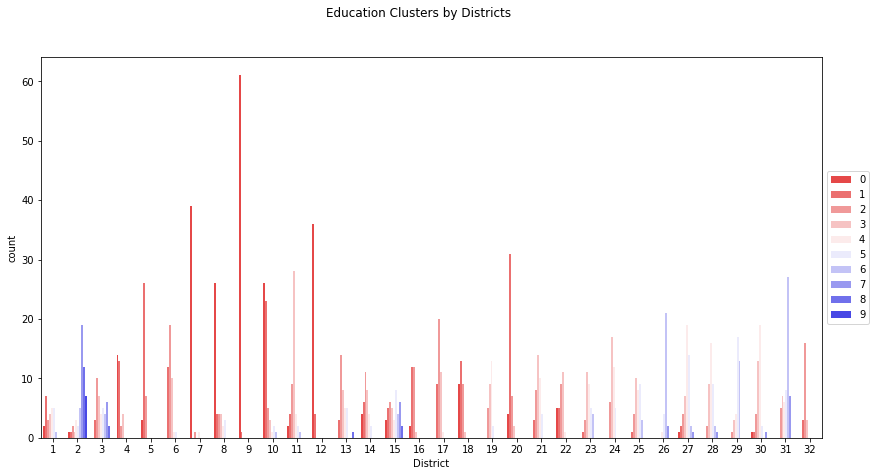

In [25]:
fig,ax = plt.subplots(1, figsize=(14,7))
plt.suptitle('Education Clusters by Districts')
sns.countplot(x="District", hue="Education Clusters", 
              data=school_explorer, ax=ax, palette='bwr_r')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticklabels(range(1,33));

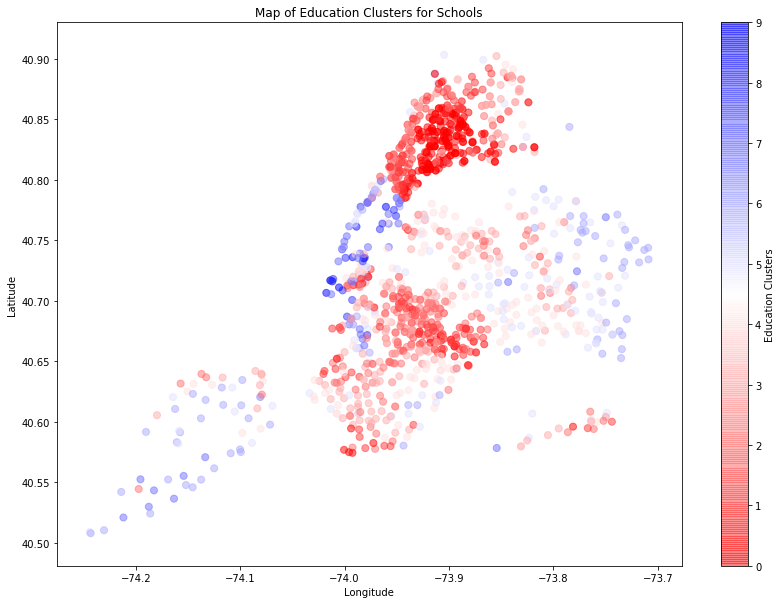

In [26]:
fig,ax = plt.subplots(1, figsize=(14,7))
school_explorer.plot(kind="scatter",x="Longitude", y="Latitude",
                     s=50, c="Education Clusters", ax=ax,
                     title='Map of Education Clusters for Schools',
                     cmap=cm.bwr_r,colorbar=True,alpha=0.5,figsize=(14,10));

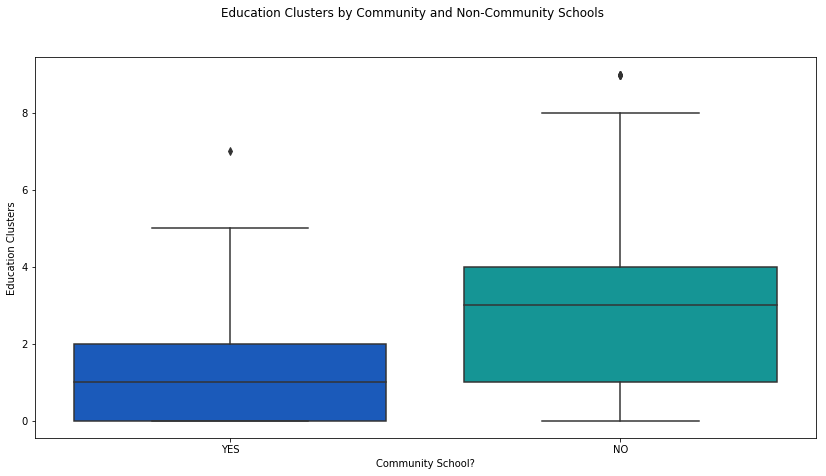

In [293]:
fig,ax = plt.subplots(1, figsize=(14,7))
plt.suptitle('Education Clusters by Community and Non-Community Schools')
sns.boxplot(x="Community School?",y="Education Clusters",
            data=school_explorer, ax=ax, palette='winter')
ax.set_xticklabels(['YES','NO']);

In [301]:
# By education results and social environment
X = school_explorer[['Average ELA Proficiency','Average Math Proficiency',
                     'Student Attendance Rate',
                     'Percent of Students Chronically Absent',                     
                     'Rigorous Instruction %','Collaborative Teachers %',
                     'Supportive Environment %','Effective School Leadership %',
                     'Strong Family-Community Ties %','Trust %']]
n = 10

clf = KMeans(n_clusters=n,random_state=23)
cluster_labels = clf.fit_predict(np.array(X))
school_explorer['Education Clusters'] = cluster_labels

In [302]:
X.groupby(school_explorer['Education Clusters']).mean()\
.sort_values('Average Math Proficiency').T

Education Clusters,6,2,9,7,3,0,5,8,1,4
Average ELA Proficiency,2.167500,2.211531,2.264476,2.386322,2.424588,2.457788,2.664787,2.772572,2.829158,3.174
Average Math Proficiency,2.179958,2.235041,2.286993,2.484872,2.516698,2.564423,2.873698,2.969295,3.069677,3.804
Student Attendance Rate,88.898305,89.754065,91.762238,92.007874,93.272192,93.740385,95.416783,95.855122,95.458717,94.875
Percent of Students Chronically Absent,43.033898,39.609756,29.097902,29.500000,21.879529,20.221154,11.346154,9.483507,11.001395,100.000
Rigorous Instruction %,84.118644,89.337398,85.027972,94.267717,89.541667,82.105769,87.125874,89.677951,94.617852,94.800
Collaborative Teachers %,76.016949,89.995935,82.461538,94.472441,89.283967,71.884615,83.251748,90.825087,95.105997,94.000
Supportive Environment %,82.067797,86.662602,84.223776,93.464567,87.585145,83.125000,87.884615,88.029514,95.046722,91.600
Effective School Leadership %,65.644068,83.467480,73.643357,89.740157,82.967391,59.201923,73.940559,85.463542,90.416318,87.300
Strong Family-Community Ties %,78.983051,83.113821,79.993007,86.984252,82.582428,78.394231,81.286713,81.206597,87.856346,92.500
Trust %,81.101695,91.243902,85.993007,95.330709,91.221467,77.875000,86.597902,91.976997,95.661785,94.000


In [296]:
indices = list(X.groupby(school_explorer['Education Clusters']).mean()\
               .sort_values('Average Math Proficiency').index)
feature_pairs = dict(zip(indices,range(10,20)))
school_explorer['Education Clusters'].replace(feature_pairs,inplace=True)
feature_pairs = dict(zip(range(10,20),range(0,10)))
school_explorer['Education Clusters'].replace(feature_pairs,inplace=True)

In [297]:
X.groupby(school_explorer['Education Clusters']).mean()\
.sort_values('Average Math Proficiency').T

,Average ELA Proficiency,Average Math Proficiency,Student Attendance Rate,Percent of Students Chronically Absent,Rigorous Instruction %,Collaborative Teachers %,Supportive Environment %,Effective School Leadership %,Strong Family-Community Ties %,Trust %
Education Clusters,,,,,,,,,,
0,2.167500,2.179958,88.898305,43.033898,84.118644,76.016949,82.067797,65.644068,78.983051,81.101695
1,2.211531,2.235041,89.754065,39.609756,89.337398,89.995935,86.662602,83.467480,83.113821,91.243902
2,2.264476,2.286993,91.762238,29.097902,85.027972,82.461538,84.223776,73.643357,79.993007,85.993007
3,2.386322,2.484872,92.007874,29.500000,94.267717,94.472441,93.464567,89.740157,86.984252,95.330709
4,2.424588,2.516698,93.272192,21.879529,89.541667,89.283967,87.585145,82.967391,82.582428,91.221467
5,2.457788,2.564423,93.740385,20.221154,82.105769,71.884615,83.125000,59.201923,78.394231,77.875000
6,2.664787,2.873698,95.416783,11.346154,87.125874,83.251748,87.884615,73.940559,81.286713,86.597902
7,2.772572,2.969295,95.855122,9.483507,89.677951,90.825087,88.029514,85.463542,81.206597,91.976997
8,2.829158,3.069677,95.458717,11.001395,94.617852,95.105997,95.046722,90.416318,87.856346,95.661785


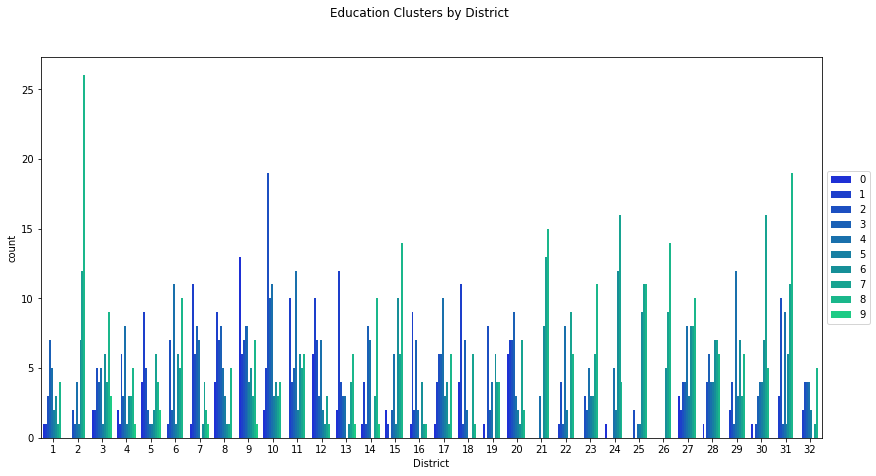

In [298]:
fig,ax = plt.subplots(1, figsize=(14,7))
plt.suptitle('Education Clusters by District')
sns.countplot(x="District", hue="Education Clusters", 
              data=school_explorer, ax=ax, palette='winter')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticklabels(range(1,33));

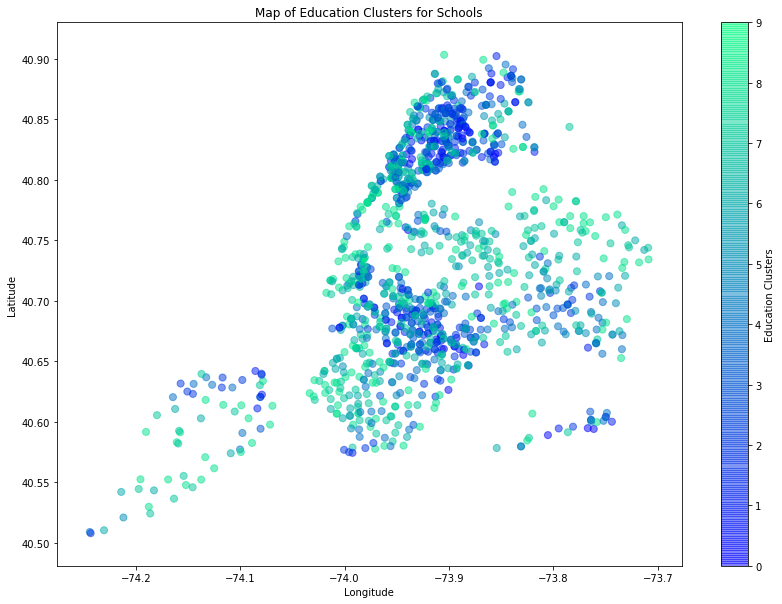

In [299]:
fig,ax = plt.subplots(1, figsize=(14,7))
school_explorer.plot(kind="scatter",x="Longitude", y="Latitude",
                     s=50, c="Education Clusters", ax=ax,
                     title='Map of Education Clusters for Schools',
                     cmap=cm.winter,colorbar=True,alpha=0.5, figsize=(14,10));

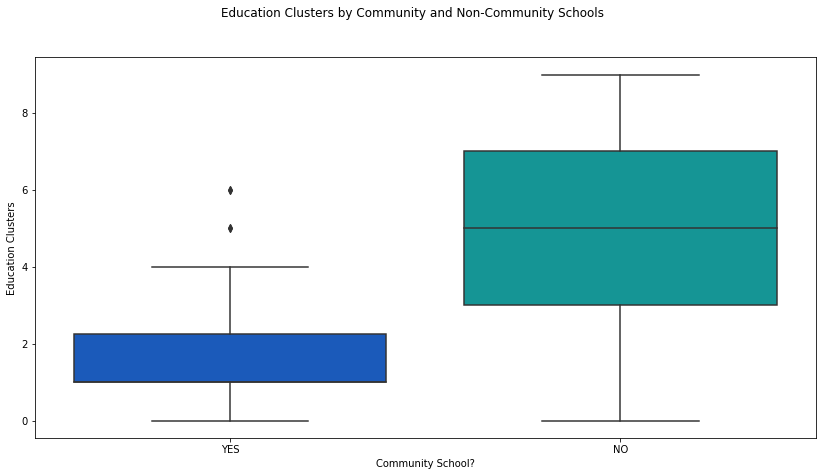

In [300]:
fig,ax = plt.subplots(1, figsize=(14,7))
plt.suptitle('Education Clusters by Community and Non-Community Schools')
sns.boxplot(x="Community School?",y="Education Clusters",
            data=school_explorer, ax=ax, palette='winter')
ax.set_xticklabels(['YES','NO']);

The distribution by clusters has certain differences for two cases but the problem regions are clearly the same.

In [345]:
general_list = ['Average ELA Proficiency','Average Math Proficiency',
                'Economic Need Index','School Income Estimate',
                'Percent ELL','Student Attendance Rate',
                'Percent of Students Chronically Absent',                     
                'Rigorous Instruction %','Collaborative Teachers %',
                'Supportive Environment %','Effective School Leadership %',
                'Strong Family-Community Ties %','Trust %']

## &#x1F310; &nbsp; Manifold Learning

Let's divide schools into educational clusters using all numerical variables.

In [376]:
X = school_explorer[numeric_list+['Average ELA Proficiency','Average Math Proficiency']]

n = 10

clf = KMeans(n_clusters=n,random_state=23)
cluster_labels = clf.fit_predict(np.array(X))
school_explorer['Education Clusters'] = cluster_labels

In [377]:
indices = list(X.groupby(school_explorer['Education Clusters']).mean()\
               .sort_values('Average Math Proficiency').index)
feature_pairs = dict(zip(indices,range(10,20)))
school_explorer['Education Clusters'].replace(feature_pairs,inplace=True)
feature_pairs = dict(zip(range(10,20),range(0,10)))
school_explorer['Education Clusters'].replace(feature_pairs,inplace=True)

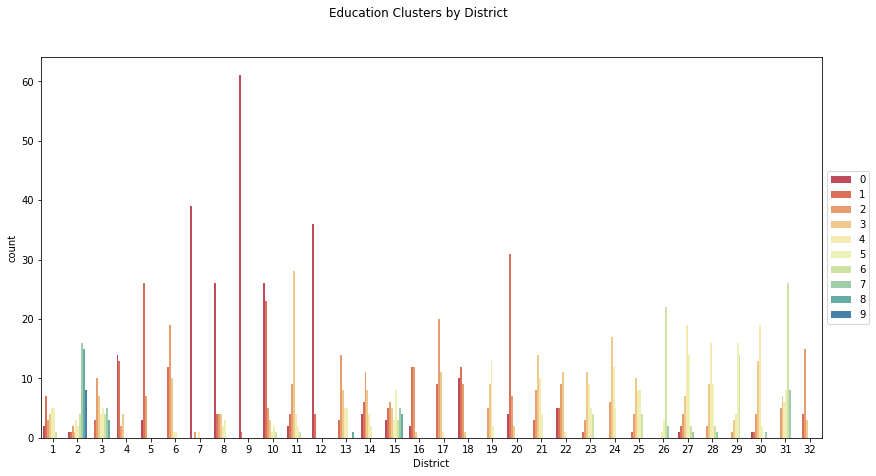

In [378]:
fig,ax = plt.subplots(1, figsize=(14,7))
plt.suptitle('Education Clusters by District')
sns.countplot(x="District", hue="Education Clusters", 
              data=school_explorer, ax=ax, palette='Spectral')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xticklabels(range(1,33));

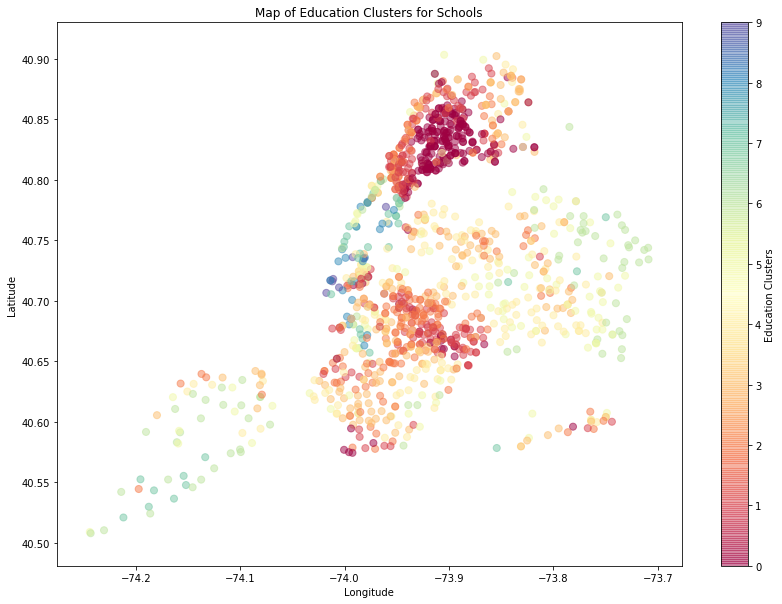

In [379]:
fig,ax = plt.subplots(1, figsize=(14,7))
school_explorer.plot(kind="scatter",x="Longitude", y="Latitude",
                     s=50, c="Education Clusters", ax=ax,
                     title='Map of Education Clusters for Schools',
                     cmap=cm.Spectral,colorbar=True,alpha=0.5, figsize=(14,10));

Now we can check whether the multidimensional data form a certain structure. We use for this purpose a probability algorithm and a transformation to two-dimensional space. The color on the chart still marks educational clusters.

In [380]:
X = school_explorer[numeric_list+['Average ELA Proficiency','Average Math Proficiency']]

tsne = TSNE(n_components=2,random_state=23)
X_embedded = tsne.fit_transform(np.array(X))
X_embedded.shape

(1272, 2)

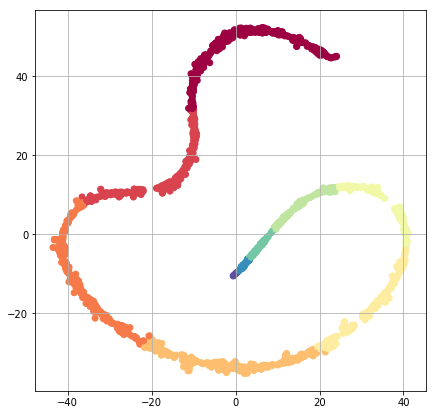

In [383]:
plt.figure(figsize=(7,7))
plt.scatter(X_embedded[:,1], X_embedded[:,0],
            c=school_explorer['Education Clusters'], 
            cmap=cm.Spectral)
plt.grid();

It seems like this clustering is done correctly.

## &#x1F310; &nbsp; Feature Correlation

Many numerical variables demonstrate a strong correlation.

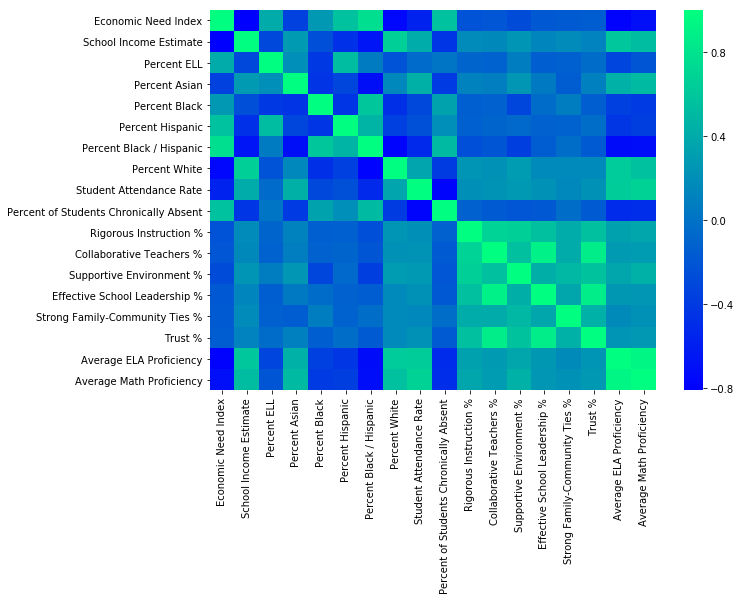

In [236]:
corr_matrix = school_explorer[numeric_list1[5:23]].corr()
fig,ax = plt.subplots(1, figsize=(10,7))
sns.heatmap(corr_matrix, ax=ax,
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values,
            cmap="winter");

Education results (ELA & Math) are correlated really strongly so they can be combined into one indicator.

In [400]:
pearson = school_explorer[numeric_list+['Average ELA Proficiency','Average Math Proficiency']]\
.corr(method='pearson')
corr_with_math_results = pearson.iloc[-1]
corr_with_math_results[abs(corr_with_math_results).argsort()[::-1]][:20]

Average Math Proficiency                  1.000000
Average ELA Proficiency                   0.935253
Percent Black / Hispanic                 -0.718155
Economic Need Index                      -0.704222
Student Attendance Rate                   0.679338
Grade 5 Math 4s - All Students            0.625105
Grade 3 Math 4s - All Students            0.623729
Grade 4 Math 4s - All Students            0.617929
Grade 5 ELA 4s - All Students             0.608659
Grade 4 ELA 4s - All Students             0.599617
Grade 3 ELA 4s - All Students             0.576874
Percent White                             0.560561
School Income Estimate                    0.520434
Percent Asian                             0.512632
Percent of Students Chronically Absent   -0.490891
Grade 3 Math 4s - White                   0.466235
Grade 4 ELA 4s - White                    0.465971
Grade 5 Math 4s - White                   0.465401
Grade 4 Math 4s - White                   0.462408
Grade 5 ELA 4s - White         

In [405]:
pearson = school_explorer[numeric_list+['Average ELA Proficiency','Average Math Proficiency']]\
.corr(method='pearson')
corr_with_ela_results = pearson.iloc[-2]
corr_with_ela_results[abs(corr_with_ela_results).argsort()[::-1]][:20]

Average ELA Proficiency                   1.000000
Average Math Proficiency                  0.935253
Economic Need Index                      -0.794865
Percent Black / Hispanic                 -0.732782
Student Attendance Rate                   0.637642
Percent White                             0.631241
School Income Estimate                    0.601464
Grade 5 ELA 4s - All Students             0.574409
Grade 4 ELA 4s - All Students             0.542865
Grade 5 Math 4s - All Students            0.540469
Grade 3 ELA 4s - All Students             0.534498
Grade 4 Math 4s - All Students            0.514023
Grade 3 Math 4s - All Students            0.509892
Percent of Students Chronically Absent   -0.505659
Grade 5 ELA 4s - White                    0.495468
Grade 4 ELA 4s - White                    0.493332
Grade 5 Math 4s - White                   0.491916
Grade 4 Math 4s - White                   0.483447
Grade 3 Math 4s - White                   0.480795
Grade 3 ELA 4s - White         